# This is draft 2 of the notebook

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})

In [1]:
import urllib.request
import urllib.parse
import os
import pandas as pd
import cuzcatlan as cusca
import numpy as np
import genepattern
import ccalnoir as ccal

def std_filter(df):
    std = df.std(axis=1)
    min_std = 0.1*std.mean() # Filter genes that are below 10th percentile
    # mean = df.mean(axis=1)
    new_std = std[std > min_std]
    print("{} genes were filtered out -- they had a Standard Deviation lower than {:2.2f} (mean std was ~{})".format(std.count() - new_std.count(), min_std, int(std.mean()) ))
    print("New gene lengths is {}".format(new_std.count()))
    filtered_df = df.iloc[new_std.index]
    return filtered_df


def sort_TCGA_samples(df, make_cls=True, name='sorted_cls.cls'):
    cols = list(df.columns)
    temp_cols = [sample[::-1] for sample in cols]
    temp_cols = sorted(temp_cols)
    if make_cls:
        cusca.list2cls(np.array([int(sample[:2][::-1][0]) for sample in temp_cols]), name_of_out=name,sep=' ')
    temp_cols = [sample[::-1] for sample in temp_cols]
    return df[temp_cols]


@genepattern.build_ui(parameters={
    "cancer_type": {
        "default": "LGG",
        "type": "choice",
        "choices": {
            "Adrenocortical Carcinoma (ACC)":"ACC",
            "Bladder Urothelial Carcinoma (BLCA)": "BLCA",
            "Breast Invasive Carcinoma (BRCA)": "BRCA",
            "Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma (CESC)": "CESC",
            "Cholangiocarcinoma (CHOL)": "CHOL",
            "Colon Adenocarcinoma (COAD)": "COAD",
            "Lymphoid Neoplasm Diffuse Large B-cell Lymphoma (DLBC)": "DLBC",
            "Esophageal Carcinoma (ESCA)": "ESCA",
            "Glioblastoma Multiforme (GBM)":"GBM",
            "Head and Neck Squamous Cell Carcinoma (HNSC)":"HNSC",
            "Kidney Chromophobe (KICH)":"KICH",
            "Kidney Renal Clear Cell Carcinoma (KIRC)":"KIRC",
            "Kidney Renal Papillary Cell Carcinoma (KIRP)":"KIRP",
            "Acute Myeloid Leukemia (LAML)":"LAML",
            "Brain Lower Grade Glioma (LGG)":"LGG",
            "Liver Hepatocellular Carcinoma (LIHC)":"LIHC",
            "Lung Adenocarcinoma (LUAD)":"LUAD",
            "Lung Squamous Cell Carcinoma (LUSC)":"LUSC",
            "Mesothelioma (MESO)":"MESO",
            "Ovarian Serous Cystadenocarcinoma (OV)":"OV",
            "Pancreatic Adenocarcinoma (PAAD)":"PAAD",
            "Pheochromocytoma and Paraganglioma (PCPG)":"PCPG",
            "Prostate Adenocarcinoma (PRAD)":"PRAD",
            "Rectum Adenocarcinoma (READ)":"READ",
            "Sarcoma (SARC)":"SARC",
            "Skin Cutaneous Melanoma (SKCM)":"SKCM",
            "Stomach Adenocarcinoma (STAD)":"STAD",
            "Testicular Germ Cell Tumors (TGCT)":"TGCT",
            "Thyroid Carcinoma (THCA)":"THCA",
            "Thymoma (THYM)":"THYM",
            "Uterine Corpus Endometrial Carcinoma (UCEC)":"UCEC",
            "Uterine Carcinosarcoma (UCS)":"UCS",
            "Uveal Melanoma (UVM)":"UVM",
        }
    },
    "output_var":{
        "hide":True}
})
def load_TCGA_RNASeq_counts(cancer_type, load_cls=True, filter_dataset=True):
    global selected_type
    selected_type = cancer_type
    global was_filtered
    was_filtered = filter_dataset
    gct_url = f"https://datasets.genepattern.org/data/TCGA_HTSeq_counts/{cancer_type}/{cancer_type}_TCGA.gct"
    cls_url = f"https://datasets.genepattern.org/data/TCGA_HTSeq_counts/{cancer_type}/{cancer_type}_TCGA.cls"
    
    if filter_dataset:
        file_list = []
    else:
        file_list = [gct_url]
    print("Importing:",gct_url)
    urllib.request.urlretrieve(gct_url, os.path.basename(urllib.parse.urlparse(gct_url).path))
    print('\tdone importing!')
    if load_cls:
        if not(filter_dataset):
            file_list.append(cls_url)
        urllib.request.urlretrieve(cls_url, os.path.basename(urllib.parse.urlparse(cls_url).path))
    if filter_dataset:
        print('Starting the filtering process.')
        filtered_name = os.path.basename(urllib.parse.urlparse(gct_url).path).strip('.gct')+'.filtered.gct'
        filtered_df = std_filter(pd.read_table(gct_url,header=2))
        filtered_df.index = filtered_df['Name']
        filtered_df = sort_TCGA_samples(filtered_df.drop(['Name','Description'],axis=1,inplace=False), name = filtered_name.replace(".gct",".cls"))
        cusca.df2gct(filtered_df, name=filtered_name, use_index=True)
        file_list.append(filtered_name)
        file_list.append(filtered_name.replace(".gct",".cls"))
    return genepattern.GPUIOutput(files=file_list)

<IPython.core.display.Javascript object>

UIBuilder(function_import='nbtools.tool(id="load_TCGA_RNASeq_counts", origin="Notebook").function_or_method', …

In [8]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
import nbtools
from gp.data import GCT
lgg_tcga_gct_dataframe = GCT(nbtools.open("https://datasets.genepattern.org/data/TCGA_HTSeq_counts/LGG/LGG_TCGA.gct"))
lgg_tcga_gct_dataframe.index = lgg_tcga_gct_dataframe.index.droplevel(1)
display(lgg_tcga_gct_dataframe.head())
len(lgg_tcga_gct_dataframe)

,TCGA-S9-A6U8-01,TCGA-P5-A72W-01,TCGA-VM-A8CH-01,TCGA-DU-5849-01,TCGA-F6-A8O3-01,TCGA-P5-A735-01,TCGA-HW-7495-01,TCGA-P5-A781-01,TCGA-HT-A74O-01,TCGA-FG-A87Q-01,...,TCGA-DH-5142-01,TCGA-E1-A7YV-01,TCGA-FG-A4MX-01,TCGA-DU-8164-01,TCGA-HT-A5RA-01,TCGA-DU-6394-01,TCGA-HW-A5KL-01,TCGA-S9-A7R2-01,TCGA-VM-A8C9-01,TCGA-P5-A731-01
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,4543,3278,1833,2745,3751,2437,3168,4018,2417,4508,...,3458,3510,1240,5572,3240,3991,3206,7277,2176,4313
TNMD,7,6,0,6,8,0,3,7,0,5,...,12,5,4,10,9,1,1,135,47,10
DPM1,1156,998,919,1098,1603,686,936,1156,963,725,...,1035,1298,658,1395,1486,1427,752,836,664,1080
SCYL3,890,404,484,736,1094,399,667,698,385,441,...,816,800,286,1190,796,1216,636,585,197,489
C1orf112,399,81,195,215,336,169,183,222,147,234,...,366,625,88,340,457,229,307,220,94,196


60483

In [9]:
def display_distributions(df,log_normalize=True):
    if log_normalize:
        to_plot =  df.apply(np.log10)
    else:
        to_plot =  df
    print(len(to_plot))
    to_plot.apply(lambda x: sns.kdeplot(x,legend=False,color='k'))

In [10]:
# display_distributions(lgg_tcga_gct_dataframe,log_normalize=False)

60483


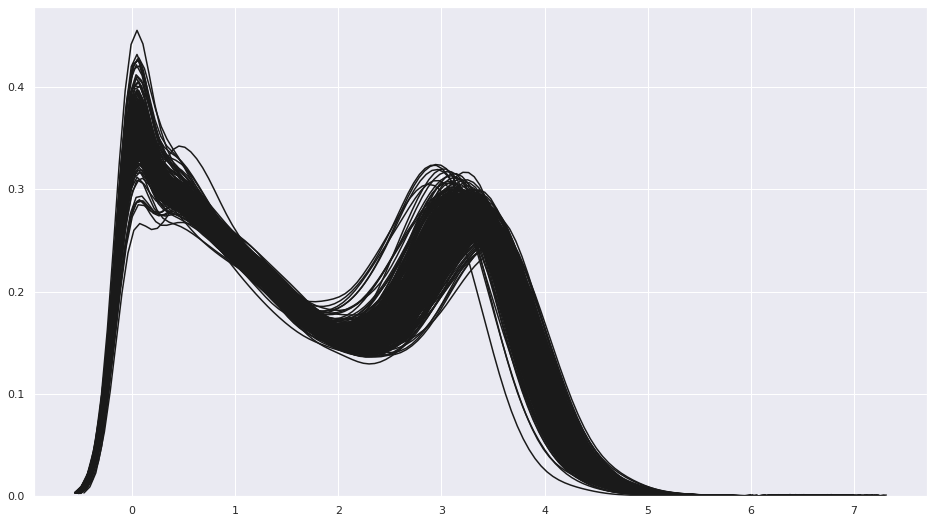

In [13]:
display_distributions(lgg_tcga_gct_dataframe)

In [14]:
def quantile_normalize(df):
    # from https://stackoverflow.com/questions/37935920/quantile-normalization-on-pandas-dataframe/37957466
    # look into https://github.com/ShawnLYU/Quantile_Normalize
    rank_mean = df.stack().groupby(df.rank(method='first').stack().astype(int)).mean()
    return df.rank(method='min').stack().astype(int).map(rank_mean).unstack()

def filter_out_zeros(df):
    return

def remove_genes_with_all_zeros(df):
    #return df[(df.T != 0).any()]
    return df.loc[~(df==0).all(axis=1)]

def remove_genes_with_all_eps(df,eps=0.1):
    #return df[(df.T != 0).any()]
    return df.loc[~(df<=eps).all(axis=1)]

In [139]:
lgg_tcga_gct_dataframe.head().max(axis=1)

Name
TSPAN6      13993
TNMD          226
DPM1         2470
SCYL3        1660
C1orf112     1474
dtype: int64

In [140]:
remove_genes_with_all_eps(lgg_tcga_gct_dataframe.head(),eps=226)

,TCGA-S9-A6U8-01,TCGA-P5-A72W-01,TCGA-VM-A8CH-01,TCGA-DU-5849-01,TCGA-F6-A8O3-01,TCGA-P5-A735-01,TCGA-HW-7495-01,TCGA-P5-A781-01,TCGA-HT-A74O-01,TCGA-FG-A87Q-01,...,TCGA-DH-5142-01,TCGA-E1-A7YV-01,TCGA-FG-A4MX-01,TCGA-DU-8164-01,TCGA-HT-A5RA-01,TCGA-DU-6394-01,TCGA-HW-A5KL-01,TCGA-S9-A7R2-01,TCGA-VM-A8C9-01,TCGA-P5-A731-01
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,4543,3278,1833,2745,3751,2437,3168,4018,2417,4508,...,3458,3510,1240,5572,3240,3991,3206,7277,2176,4313
DPM1,1156,998,919,1098,1603,686,936,1156,963,725,...,1035,1298,658,1395,1486,1427,752,836,664,1080
SCYL3,890,404,484,736,1094,399,667,698,385,441,...,816,800,286,1190,796,1216,636,585,197,489
C1orf112,399,81,195,215,336,169,183,222,147,234,...,366,625,88,340,457,229,307,220,94,196


57652


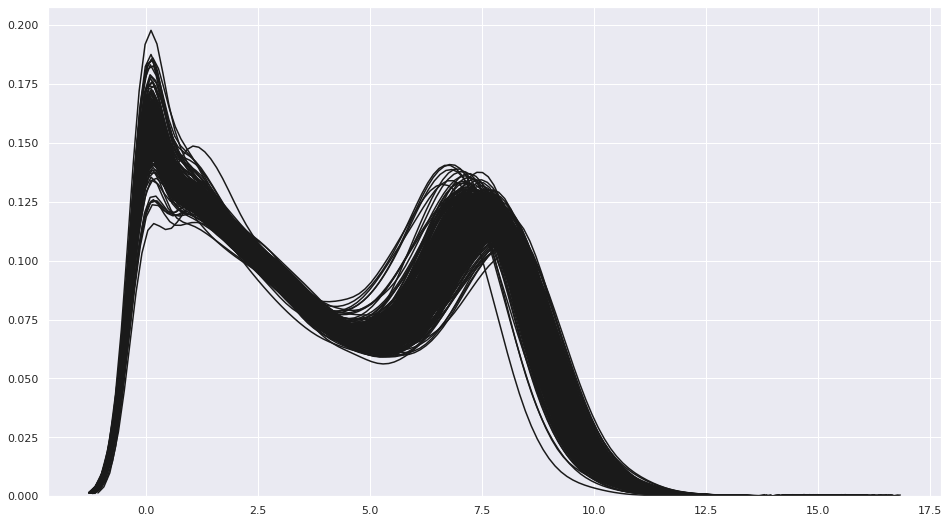

In [145]:
display_distributions(remove_genes_with_all_zeros(lgg_tcga_gct_dataframe))

57652


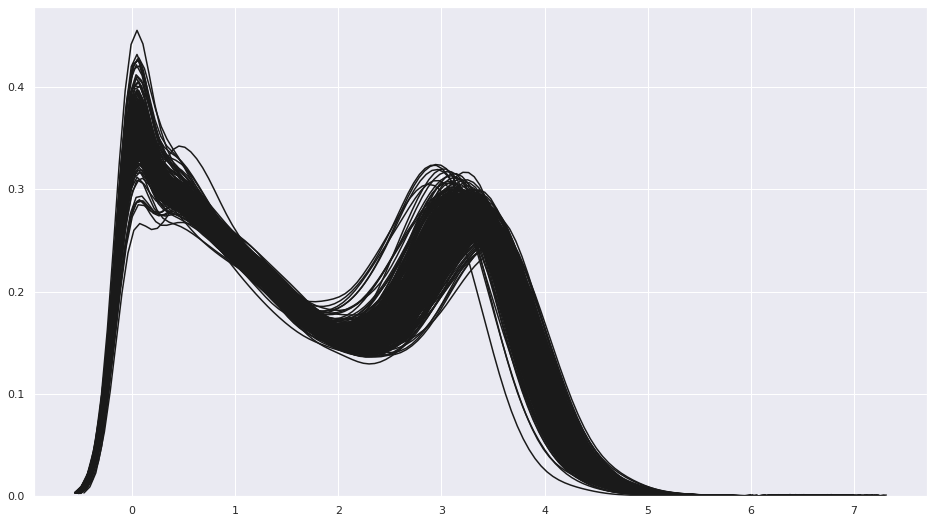

In [18]:
display_distributions(remove_genes_with_all_eps(lgg_tcga_gct_dataframe))

52519


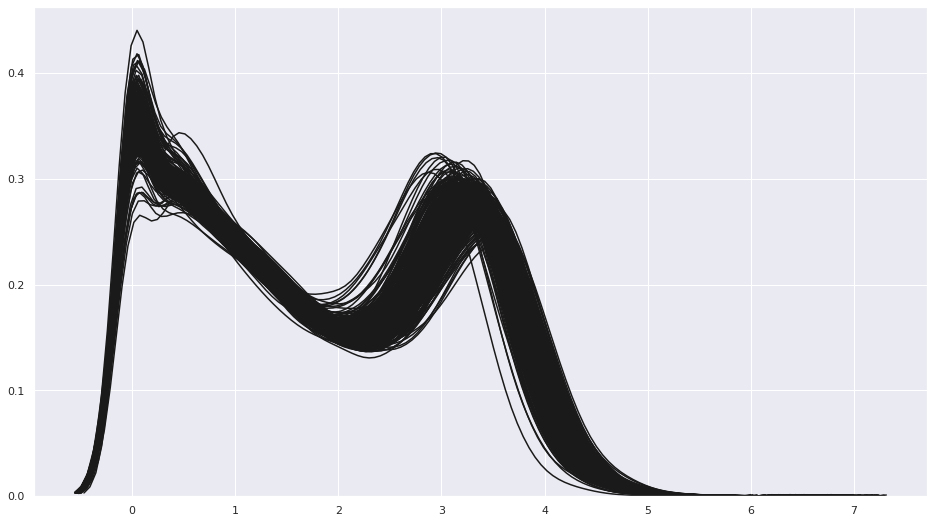

In [17]:
display_distributions(remove_genes_with_all_eps(lgg_tcga_gct_dataframe,eps=1))

34834


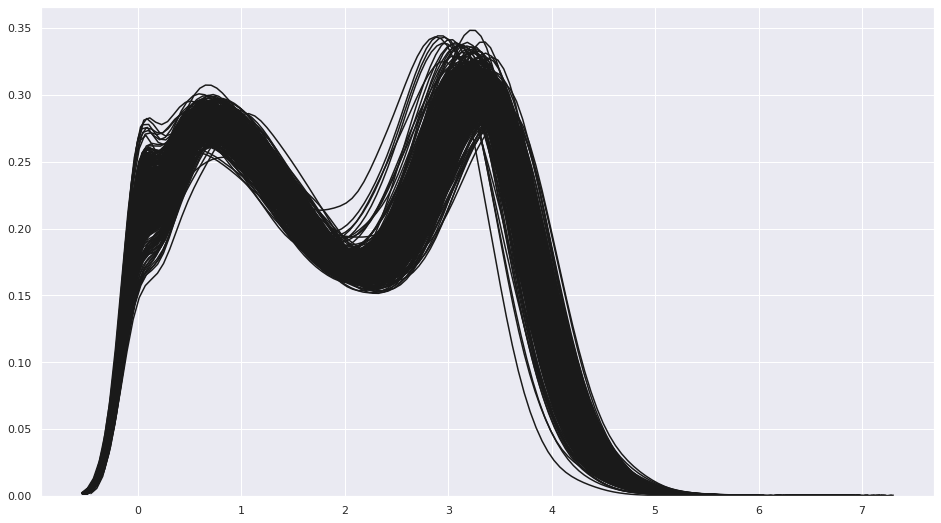

In [16]:
display_distributions(remove_genes_with_all_eps(lgg_tcga_gct_dataframe,eps=10))

34834


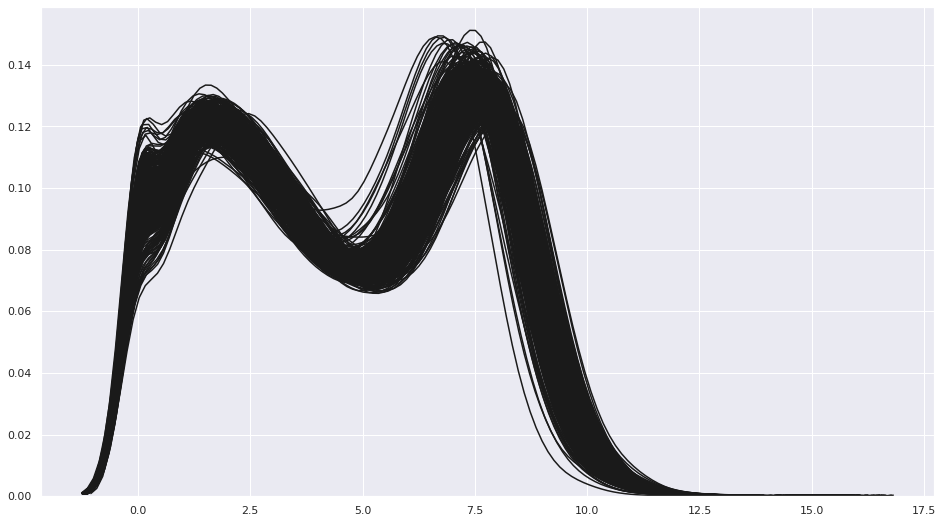

In [148]:
display_distributions(remove_genes_with_all_eps(lgg_tcga_gct_dataframe,eps=10))

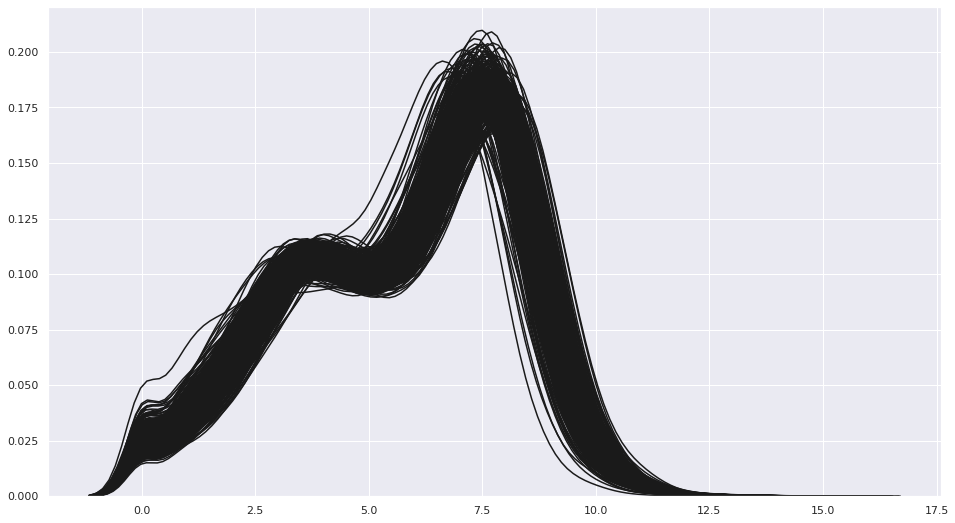

In [123]:
display_distributions(remove_genes_with_all_eps(lgg_tcga_gct_dataframe,eps=100),log_normalize=True)

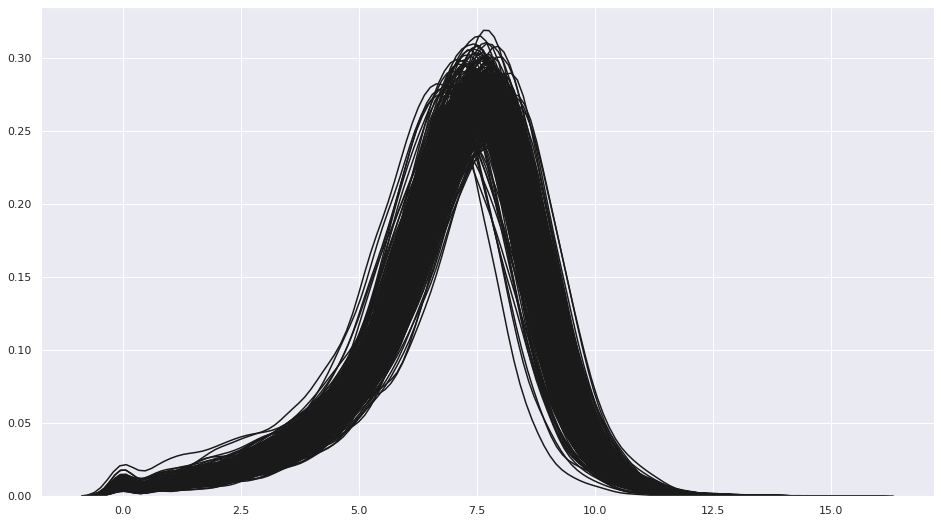

In [124]:
display_distributions(remove_genes_with_all_eps(lgg_tcga_gct_dataframe,eps=1000),log_normalize=True)